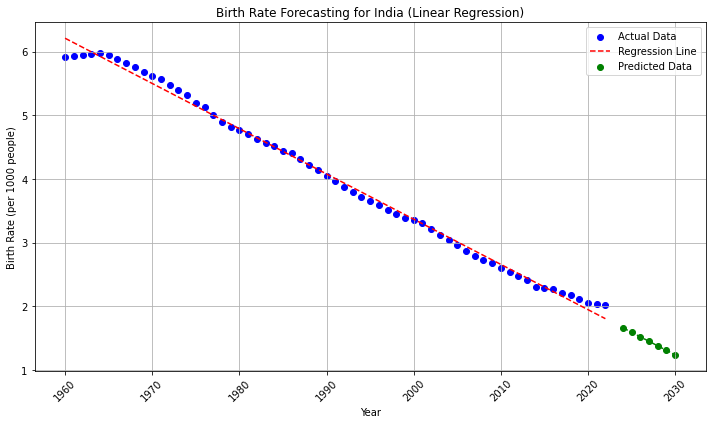

Predicted Birth Rate for 2024: 1.66 per 1000 people
Predicted Birth Rate for 2025: 1.59 per 1000 people
Predicted Birth Rate for 2026: 1.52 per 1000 people
Predicted Birth Rate for 2027: 1.45 per 1000 people
Predicted Birth Rate for 2028: 1.38 per 1000 people
Predicted Birth Rate for 2029: 1.31 per 1000 people
Predicted Birth Rate for 2030: 1.23 per 1000 people


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
file_path = r"C:\Users\Lenovo\Downloads\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162 (2)\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162.csv"
df = pd.read_csv(file_path, delimiter=',', skiprows=4, on_bad_lines='skip')

# Clean column names
df.columns = df.columns.str.replace('"', '').str.strip()

# Reshape data
df_long = pd.melt(df[['Country Name'] + [str(year) for year in range(1960, 2024)]],
                  id_vars=["Country Name"], var_name="Year", value_name="Birth Rate")
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['Birth Rate'] = pd.to_numeric(df_long['Birth Rate'], errors='coerce')
df_long.dropna(subset=['Birth Rate'], inplace=True)

# Filter data for India
df_country = df_long[df_long['Country Name'] == 'India']

# Prepare data for Linear Regression
X = df_country[['Year']].values  # Independent variable (Years)
y = df_country['Birth Rate'].values  # Dependent variable (Birth Rate)

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Forecast future birth rates (2024-2030)
future_years = np.array(range(2024, 2031)).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot historical data
plt.figure(figsize=(10, 6))
plt.scatter(df_country['Year'], df_country['Birth Rate'], color='blue', label='Actual Data')
plt.plot(df_country['Year'], model.predict(X), color='red', linestyle='--', label='Regression Line')

# Plot predictions
plt.scatter(future_years, future_predictions, color='green', label='Predicted Data')
plt.plot(future_years, future_predictions, color='green', linestyle='--')

# Labels & Title
plt.title('Birth Rate Forecasting for India (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1000 people)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print predictions
for year, rate in zip(future_years.flatten(), future_predictions):
    print(f"Predicted Birth Rate for {year}: {rate:.2f} per 1000 people")
